<a href="https://colab.research.google.com/github/yarnikitin/-/blob/master/%D0%94%D0%97_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('winequality-red.csv', ';')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [23]:
df['good'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [27]:
dfg = df.groupby('quality')[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', \
'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].mean()
dfg.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Выявление показателей, влияющих на качество

In [28]:
plt.style.use('fivethirtyeight')

In [30]:
va = df.groupby('quality')['volatile acidity'].agg(volatile_acidity = 'mean').reset_index().sort_values(by = 'quality', ascending = False)
va.head(10)

,quality,volatile_acidity
5,8,0.423333
4,7,0.403920
3,6,0.497484
2,5,0.577041
1,4,0.693962
0,3,0.884500


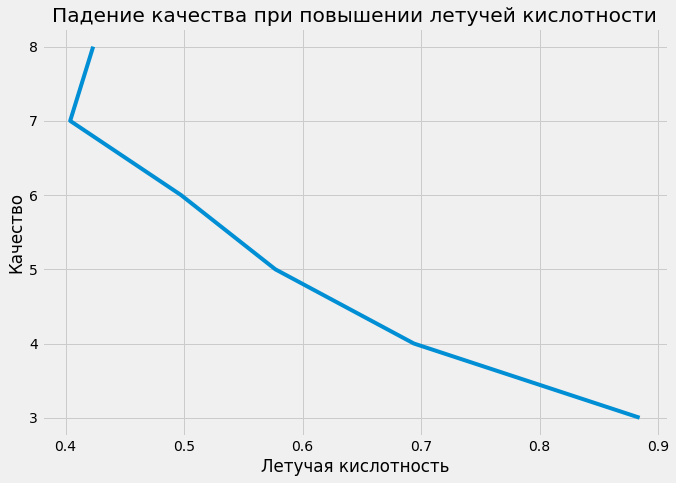

In [34]:
plt.figure(figsize = (10,7))

plt.plot(va['volatile_acidity'], va['quality'])

plt.title('Падение качества при повышении летучей кислотности')
plt.xlabel('Летучая кислотность')
plt.ylabel('Качество')

plt.show()

Качество начинает падать, когда уровень летучей кислотности превышает значение 0.4

In [36]:
ca = df.groupby('quality')['citric acid'].mean().reset_index().sort_values(by = 'citric acid', ascending = False)
ca.head(10)

,quality,citric acid
5,8,0.391111
4,7,0.375176
3,6,0.273824
2,5,0.243686
1,4,0.174151
0,3,0.171000


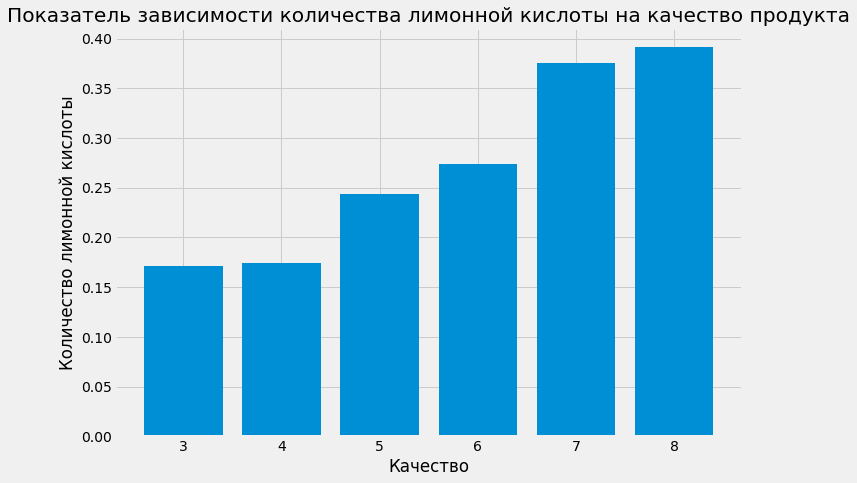

In [38]:
plt.figure(figsize = (10,7))

plt.bar(ca['quality'],ca['citric acid'])

plt.title('Показатель зависимости количества лимонной кислоты на качество продукта')
plt.xlabel('Качество')
plt.ylabel('Количество лимонной кислоты')
plt.xticks(rotation = 0)

plt.show()

По диаграме видно, что чем больше лимонной кислоты, тем выше качество продукта

Сопоставляем параметр летучей кислотности и параметр лимонной кислоты для выяснения достежения максимального качества

In [41]:
ca_va = pd.merge(va, ca, on = 'quality', how = 'left').sort_values(by = 'quality', ascending = True)
ca_va.head(10)

,quality,volatile_acidity,citric acid
5,3,0.884500,0.171000
4,4,0.693962,0.174151
3,5,0.577041,0.243686
2,6,0.497484,0.273824
1,7,0.403920,0.375176
0,8,0.423333,0.391111


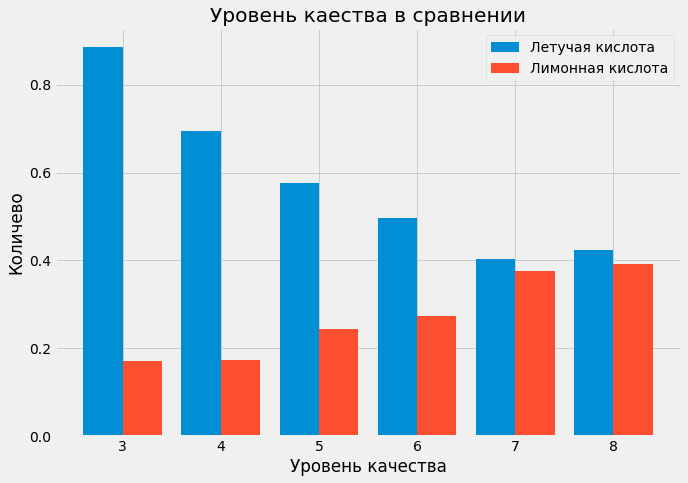

In [43]:
plt.figure(figsize = (10,7))

import numpy as np
n_ticks = np.arange(len(ca_va['volatile_acidity']))
offset = 0.2
w = 0.4

plt.bar(n_ticks - offset, ca_va['volatile_acidity'], width=w)
plt.bar(n_ticks + offset, ca_va['citric acid'], width=w)

plt.title('Уровень каества в сравнении')
plt.xlabel('Уровень качества')
plt.ylabel('Количево')
plt.legend(['Летучая кислота','Лимонная кислота'])
plt.xticks(n_ticks, ca_va['quality'], rotation = 0) 

plt.show()

Для достежения максимального качества соотношение лимонной кислоты и летучей кислотности должно быть приблизительно в равных значениях

Выделение основных показателей, влияющих на качество вина и вывод процентного соотношения для получения максимального качества

In [45]:
data = df.groupby('quality')[['volatile acidity', 'citric acid', 'chlorides', 'sulphates']] \
.mean().sort_values(by = 'quality', ascending = False).reset_index()
data.head(10)

,quality,volatile acidity,citric acid,chlorides,sulphates
0,8,0.423333,0.391111,0.068444,0.767778
1,7,0.403920,0.375176,0.076588,0.741256
2,6,0.497484,0.273824,0.084956,0.675329
3,5,0.577041,0.243686,0.092736,0.620969
4,4,0.693962,0.174151,0.090679,0.596415
5,3,0.884500,0.171000,0.122500,0.570000


In [46]:
data2 = data[['volatile acidity', 'citric acid', 'chlorides', 'sulphates']].head(1)
data2.head(10)

,volatile acidity,citric acid,chlorides,sulphates
0,0.423333,0.391111,0.068444,0.767778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


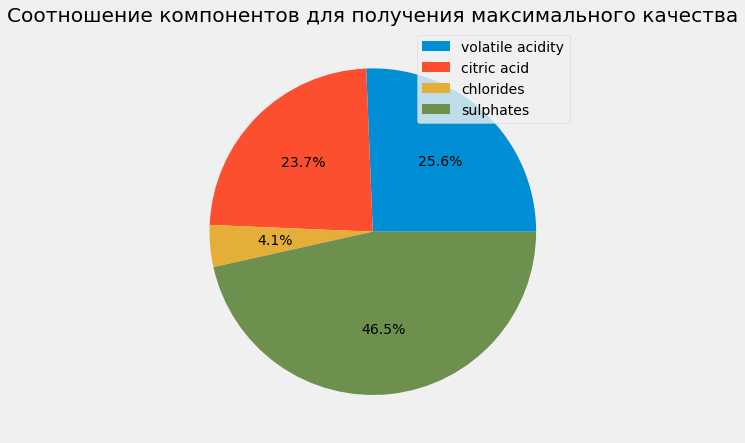

In [48]:
plt.figure(figsize = (10,7))

plt.pie(data2, autopct='%1.1f%%')

plt.title('Соотношение компонентов для получения максимального качества')
plt.legend(data2.columns)

plt.show()

In [49]:
data3 = data[['volatile acidity', 'citric acid', 'chlorides', 'sulphates']].iloc[5,:]
data3.head(10)

volatile acidity    0.8845
citric acid         0.1710
chlorides           0.1225
sulphates           0.5700
Name: 5, dtype: float64

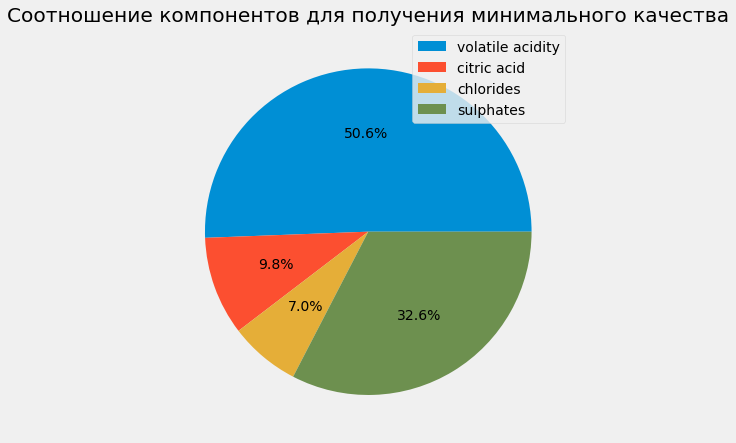

In [51]:
plt.figure(figsize = (10,7))

plt.pie(data3, autopct='%1.1f%%')

plt.title('Соотношение компонентов для получения минимального качества')
plt.legend(data3.index)

plt.show()

Визуализация корреляционной зависимостви двух показателей

In [53]:
sul = data[['quality', 'sulphates']]
ca = data[['quality', 'citric acid']]

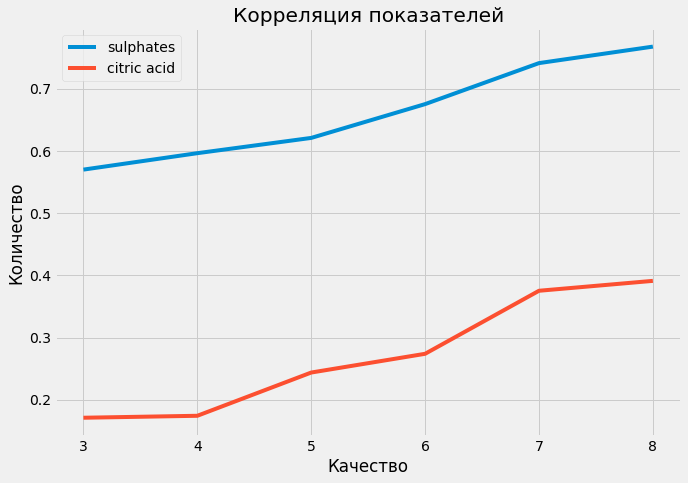

In [54]:
plt.figure(figsize = (10,7))

plt.plot(sul['quality'], sul['sulphates'])
plt.plot(ca['quality'], ca['citric acid'])

plt.title('Корреляция показателей')
plt.xlabel('Качество')
plt.ylabel('Количество')
plt.legend(['sulphates','citric acid'])

plt.show()